In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import soydata
from soydata.data.regression import make_linear_regression_data

print(f'seaborn=={sns.__version__}')
print(f'scikit-learn=={sklearn.__version__}')
print(f'soydata=={soydata.__version__}')

seaborn==0.9.0
scikit-learn==0.22
soydata==0.1.0


In [2]:
X_raw, y, y_true = make_linear_regression_data(n_samples=100,
    a=1.0, b=-0.5, noise=1, x_range=(-1, 1), seed=0)



In [3]:
print(X_raw.shape)
print(y.shape)
print(y_true.shape)

(100,)
(100,)
(100,)


# Drawing Scatter Plot

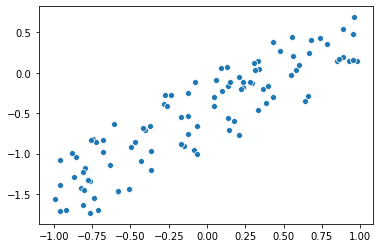

In [4]:
fig = sns.scatterplot(x=X_raw, y=y)

<class 'matplotlib.axes._subplots.AxesSubplot'>


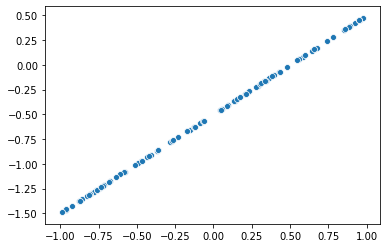

In [5]:
fig2 = sns.scatterplot(x=X_raw, y=y_true)
print(type(fig2))

# Numpy Tips

[0, 1, 2] + [3, 4]를 [0, 1, 2, 3, 4] 형태로 병합할 수 있다

In [6]:
n_data = X_raw.shape[0]
dataset_x = np.concatenate([X_raw, X_raw])
dataset_y = np.concatenate([y, y_true])
dataset_category = ['sample'] * n_data + ['true'] * n_data

print(dataset_x.shape, dataset_y.shape)

(200,) (200,)


## python dict를 Pandas Dataframe으로 변환

In [7]:
dataset = {
    'x': dataset_x,
    'y': dataset_y,
    'category': dataset_category
}

source = pd.DataFrame(dataset)
source.head(3)

x         y category
0  0.097627 -0.224556   sample
1  0.430379 -0.299613   sample
2  0.205527 -0.059279   sample

# Differences between scatterplot and replot in seaborn

<class 'seaborn.axisgrid.FacetGrid'>


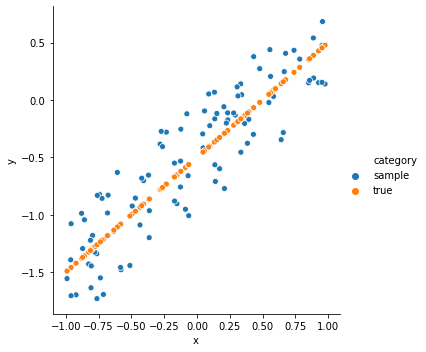

In [8]:
fig3 = sns.relplot(x='x', y='y', hue='category', kind='scatter', data=source)
print(type(fig3))

In [11]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression(fit_intercept=True)

**LinearRegression**에는 2차원 이상의 벡터들이 학습에 사용될 수 있다.  
따라서 입력 데이터는 칼럼 벡터가 아닌 행렬 형태로 받는다.  
칼럼 벡터는 shape = (n, 1) 형식으로 `reshape` 가능  

In [12]:
X = X_raw.reshape(-1, 1) # column vector to matrix
linear_regression.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

predict() 함수는 학습된 모델로 예측을 수행한다.  
LogisticRegression 등의 대부분의 sckit-learn 구현 모델에는 `fit_predict()` 함수가 제공된다.  

In [13]:
y_pred = linear_regression.predict(X)

In [14]:
dataset = {
    'x': np.concatenate([dataset_x, X_raw]),
    'y': np.concatenate([dataset_y, y_pred]),
    'category': dataset_category + ['prediction'] * n_data
}

source = pd.DataFrame(dataset)
source.tail()

x         y    category
295 -0.633617 -1.087161  prediction
296  0.173026 -0.306108  prediction
297 -0.959785 -1.402981  prediction
298  0.657880  0.163365  prediction
299 -0.990609 -1.432827  prediction

In [15]:
source['category'].unique()

array(['sample', 'true', 'prediction'], dtype=object)

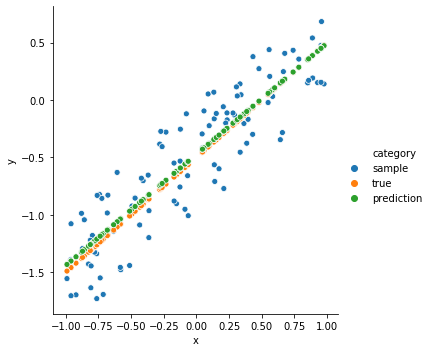

In [16]:
fig4 = sns.relplot(x='x', y='y', hue='category', kind='scatter', data=source)

모델의 파라미터 a, b는 각각 `intercept_`와 `coef_`에 저장되어 있다.

In [17]:
a_est = linear_regression.coef_
b_est = linear_regression.intercept_

print(f'a_est = {a_est}, type = {type(a_est)}, shape = {a_est.shape}')
print(f'b_est = {b_est:.3}, type = {type(b_est)}, shape = {b_est.shape}')

a_est = [0.96827553], type = <class 'numpy.ndarray'>, shape = (1,)
b_est = -0.474, type = <class 'numpy.float64'>, shape = ()


In [18]:
print(y)

[-0.22455646 -0.29961329 -0.05927923  0.05195491 -0.90393726 -0.13205444
 -0.53278365  0.35579791  0.15040715 -0.28036795  0.03057545 -0.09580149
 -0.1644316   0.14863023 -1.04413006 -1.42923566 -1.07846001  0.24651256
  0.43804886  0.43255589  0.68249096  0.09964151 -0.12095764  0.20504855
 -1.3395961  -0.11376474 -1.69410023  0.19091265 -0.29612982 -0.88059851
 -0.85287335 -0.02276392 -0.95222527 -0.56484978 -1.39245549 -0.17385624
 -0.20148331 -0.11293119  0.53959943 -0.20494097 -0.3844376  -0.75837422
 -0.16887268 -0.9876257   0.13972742  0.04516432 -1.47900799 -0.82266479
 -0.654902   -0.27373145 -0.71015815 -0.25467092  0.13924061 -1.18035081
 -1.4584265  -0.82937273  0.11353561 -0.92431606 -0.66019516 -1.44198182
 -0.98463206 -1.32570703  0.03471478 -0.85725177 -0.63131377 -0.40674632
 -0.34629946 -1.44581938  0.40588038 -1.63617351  0.47395554 -1.00835961
  0.1535187  -0.77178717  0.27222486 -1.69769973 -1.08903439 -0.83152558
 -0.7033052  -1.73070563 -1.19933948 -0.54999561 -1

In [19]:
print(y_pred)

[-0.3791146  -0.05691925 -0.27463792 -0.38672587 -0.62149083 -0.19111305
 -0.59451     0.28504397  0.42426216 -0.6993659   0.09129599 -0.41768796
 -0.34187268  0.35054518 -1.30435502 -1.27318964 -1.40276602  0.17049087
  0.06502031  0.24290297  0.45322441  0.10569139 -0.54824163  0.06961463
 -1.21287551 -0.20268024 -1.16430902  0.38747962 -0.43133406 -0.63890596
 -0.92959452  0.0574231  -0.55856157 -0.34111861 -1.40553257 -0.2458373
 -0.25656536 -0.24719579  0.38569637 -0.12154015 -0.74571457 -0.59558528
 -0.09092154 -1.32529027 -0.15069219 -0.1431955  -1.0345034  -1.19224762
 -0.83107687 -0.7375755  -0.33770482 -0.59254575  0.47211643 -1.24430499
 -1.03741947 -1.12953586 -0.17714236 -0.95140785 -0.53888535 -0.96857734
 -1.13406726 -1.22817288 -0.17090421 -1.17432163 -1.06122819 -0.72786486
  0.14797533 -1.2538784   0.18080312 -1.2558205   0.44904364 -0.53435299
  0.44962775 -0.27060574 -0.01029831 -1.36603082 -0.89424985 -1.2091532
 -0.86842936 -1.21199769 -0.82612931 -0.63967853 -1.3

In [20]:
# 잔차를 정의해보자
residual = y - y_pred

In [22]:
print(residual)

[ 0.15455815 -0.24269404  0.2153587   0.43868078 -0.28244643  0.05905861
  0.06172635  0.07075393 -0.27385501  0.41899795 -0.06072053  0.32188647
  0.17744108 -0.20191495  0.26022496 -0.15604602  0.32430601  0.07602169
  0.37302856  0.18965291  0.22926655 -0.00604988  0.42728399  0.13543392
 -0.12672059  0.0889155  -0.52979121 -0.19656697  0.13520424 -0.24169256
  0.07672118 -0.08018702 -0.3936637  -0.22373117  0.01307708  0.07198105
  0.05508205  0.1342646   0.15390306 -0.08340081  0.36127697 -0.16278894
 -0.07795114  0.33766457  0.29041961  0.18835982 -0.44450459  0.36958283
  0.17617487  0.46384405 -0.37245334  0.33787483 -0.33287582  0.06395418
 -0.42100703  0.30016312  0.29067797  0.0270918  -0.1213098  -0.47340448
  0.1494352  -0.09753416  0.20561899  0.31706986  0.42991442  0.32111854
 -0.49427479 -0.19194099  0.22507725 -0.380353    0.0249119  -0.47400661
 -0.29610904 -0.50118142  0.28252317 -0.33166891 -0.19478454  0.37762761
  0.16512416 -0.51870795 -0.37321017  0.08968293  0

In [23]:
residual[:5]

array([ 0.15455815, -0.24269404,  0.2153587 ,  0.43868078, -0.28244643])

In [24]:
print(np.array([1, 2, 3]) / np.array([3, 4, 5]))
# [0.33333333 0.5        0.6       ]

print(np.array([1, 2, 3]) ** 2)
# [1 4 9]

print(np.array([1, 2, 3]) - 0.5)
# [0.5 1.5 2.5]

[0.33333333 0.5        0.6       ]
[1 4 9]
[0.5 1.5 2.5]


In [26]:
# MAE(Mean Absolute Error)
print(np.abs(residual).mean()) # residual = y - y_pred

0.23709498511190305


In [30]:
# MAPE(Mean Absolute Percentage Error)
print(np.abs(residual / np.abs(y)).mean())

0.9255390530290607


In [31]:
# MSE(Mean Squared Error)
print((residual ** 2).mean())

0.07623324582875006


In [32]:
# RMSE(Root Mean Squared Error)
print(np.sqrt((residual ** 2).mean()))

0.2761036867351649


In [34]:
# R-square
'''
분산 대비 잔차 비율
따라서
1 - sigma((y - y_pred)^2)
'''
print(1 - (residual ** 2).sum() / ((y - y.mean()) **2).sum())

SyntaxError: invalid syntax (<ipython-input-34-510fac709ee5>, line 2)